In [8]:
import json
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

In [2]:
paths = ['/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/maj35fromE.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/min35fromE.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/seva_demo.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/1376335501_clean.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/berklee_demo.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/annotations/blue_guitar_blues.json',
         
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/exercises/Leah17Dec2018/Lesson02Ex1/l2ex1.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/exercises/Leah17Dec2018/Lesson02Ex2/l2ex2.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/exercises/Leah17Dec2018/Lesson03Ex1/l3ex1.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/exercises/Leah17Dec2018/Lesson04Ex1/l4ex1.json',
         '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/data/exercises/Leah17Dec2018/Lesson05Ex1/l5ex1.json'
        ]

In [11]:
pitch_class_names = ["C", "Db", "D", "Eb", "E", "F", "F#", "G", "Ab", "A", "Bb", "B"]
pitch_class_kinds = ['maj','min','5','1']
pitch_classes_matrix = np.array(np.meshgrid(pitch_class_names,pitch_class_kinds)).T.reshape(-1,2)
list_pitch_classes =[':'.join(x) for x in pitch_classes_matrix]

['C:maj', 'C:min', 'C:5', 'C:1', 'Db:maj', 'Db:min', 'Db:5', 'Db:1', 'D:maj', 'D:min', 'D:5', 'D:1', 'Eb:maj', 'Eb:min', 'Eb:5', 'Eb:1', 'E:maj', 'E:min', 'E:5', 'E:1', 'F:maj', 'F:min', 'F:5', 'F:1', 'F#:maj', 'F#:min', 'F#:5', 'F#:1', 'G:maj', 'G:min', 'G:5', 'G:1', 'Ab:maj', 'Ab:min', 'Ab:5', 'Ab:1', 'A:maj', 'A:min', 'A:5', 'A:1', 'Bb:maj', 'Bb:min', 'Bb:5', 'Bb:1', 'B:maj', 'B:min', 'B:5', 'B:1']


#### Current dataset pitch class set representation

In [22]:
chord_dict = {}
for pc in list_pitch_classes:
    chord_dict[pc] = 0

In [63]:
for path in paths:
    with open(path, 'r') as myfile:
            data=myfile.read()
    obj = json.loads(data)
    
    
    full_chord = ''
    for line in obj['parts'][0]['chords']:
        full_chord = full_chord + line
        
    chords = full_chord.split('|')

    for c in chords:
        c  = c.split(' ')

        for ch in c:
            if ch != '':
                if ':' not in ch:
                    ch = ch +':maj'
                ch = ch.replace('(','')
                ch = ch.replace(')','')
                if ch == 'Gb':
                    ch = 'F#'
                if ch in chord_dict.keys():
                    chord_dict[ch] += 1 
                else:
                    chord_dict[ch] = 1    

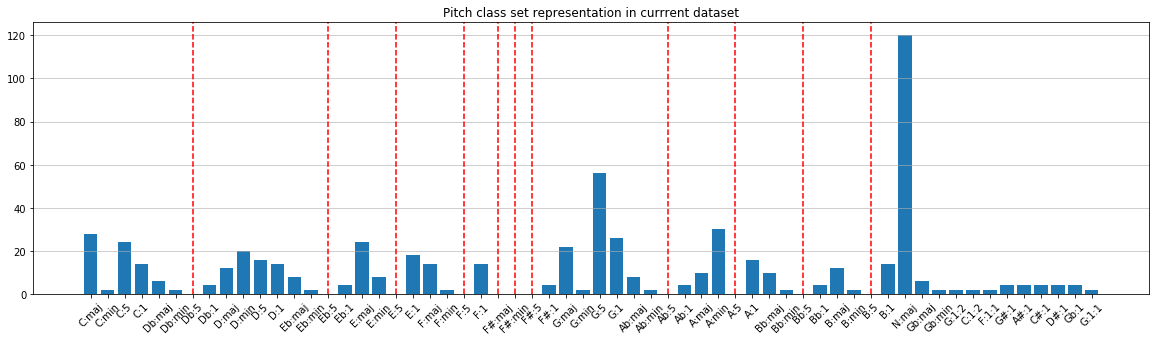

In [64]:
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(chord_dict.keys(), chord_dict.values())

not_present = np.where(np.array(list(chord_dict.values())) ==  0)[0]
for p in not_present:
    ax.axvline(x=p, color='r', linestyle='--')


plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.title('Pitch class set representation in currrent dataset')
plt.show()

- Most of the power chords missing.
- F# class not considered